In [1]:
import rho_data_eng as rho
import pandas as pd
import numpy as np
import os


pd.set_option('display.max_columns', 500)

data_path = os.getcwd()[:-len('notebooks')] + 'Data/rd/'

In [ ]:
data_path

In [ ]:
def missing_zero_values_table(df):

        zero_val = (df == 0.00).astype(int).sum(axis=0)

        mis_val = df.isnull().sum()

        mis_val_percent = 100 * df.isnull().sum() / len(df)

        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)

        mz_table = mz_table.rename(

        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})

        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']

        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)

        mz_table['Data Type'] = df.dtypes

        mz_table = mz_table[

            mz_table.iloc[:,1] != 0].sort_values(

        '% of Total Values', ascending=False).round(1)

        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      

            "There are " + str(mz_table.shape[0]) +

              " columns that have missing values.")

        return mz_table

# Reducción de dimensiones

In [2]:
def stocks(codes, data_source = 'yahoo', start = '2017-10-07', end = '2021-10-07', wd = 14):
    
    import pandas_datareader as web
    
    result = dict()
    for c in codes:
        df = web.DataReader(c, data_source = data_source, start = start, end = end)
        df_final = df.copy()
        
        for i in range(2,wd):
            
        
            df_roll = df.rolling(i, 1).mean()
            df_pct = df.pct_change(i)
            df_pct = df_pct.fillna(df_pct.mean())
            df_final = df_final.merge(df_roll, how = 'inner', left_index = True, right_index = True, suffixes = ('', f'_roll_{i}'))
            df_final = df_final.merge(df_pct, how = 'inner', left_index = True, right_index = True, suffixes = ('', f'_pct_{i}'))
            

        
        result[c] = df_final.copy()
    
    
    
    
    return(result)

In [3]:
hola = stocks(['AAPL'], start = '2021-10-01', end = '2021-10-30')

In [4]:
hola['AAPL'].shape

(21, 150)

# Análisis de Multicolinealidad

In [5]:
rd_datapath = os.getcwd()[:-len('notebooks')] + 'Data/rd/'
os.listdir(rd_datapath)
#amfiles = os.listdir()

['.DS_Store',
 'archive',
 'Copy of titanic.csv',
 'data.csv',
 'archive-2',
 'Placement_Data_Full_Class.csv',
 'processed.cleveland.data',
 'HR_comma_sep.csv',
 '.ipynb_checkpoints']

In [6]:
amdf = pd.read_csv(rd_datapath + 'data.csv')
amdf

,Unnamed: 0,week,analytics,api,artificial intelligence,big data,clustering,data mining,data science,data scientist,data warehouse,deep learning,etl,excel,github,hadoop,iot,java,machine learning,matlab,minitab,modeling,python,R,regression,sql,statistician
0,1,2014-12-21,63,50,23,53,54,68,11,17,52,15,50,55,22,70,14,80,14,45,40,74,29,73,30,62,42
1,2,2014-12-28,59,52,22,54,46,60,13,17,46,14,45,52,24,61,11,77,13,40,37,77,28,59,37,53,56
2,3,2015-01-04,90,55,28,76,71,88,18,24,76,17,78,89,29,87,27,85,18,62,64,96,35,59,44,87,62
3,4,2015-01-11,94,57,33,76,73,88,20,25,85,18,84,95,30,85,26,86,21,71,67,98,37,60,47,94,70
4,5,2015-01-18,93,58,33,78,72,91,19,22,78,18,83,96,31,90,27,92,19,77,80,100,38,61,47,96,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,257,2019-11-17,71,74,87,95,100,83,93,92,97,96,94,95,73,45,96,49,99,88,67,75,98,51,77,87,75
257,258,2019-11-24,63,67,82,99,87,72,83,84,87,85,84,86,65,41,88,46,89,78,61,63,88,52,66,76,67
258,259,2019-12-01,68,72,80,83,89,79,93,86,89,95,93,93,68,42,86,46,94,82,69,70,91,52,77,81,69
259,260,2019-12-08,66,70,81,80,89,72,86,85,85,93,92,91,68,42,87,46,94,75,57,70,92,50,73,79,68


In [7]:
corr_columns = [c for c in amdf.columns if c not in amdf.columns[:2]]

In [8]:
amdf[corr_columns].corr()

,analytics,api,artificial intelligence,big data,clustering,data mining,data science,data scientist,data warehouse,deep learning,etl,excel,github,hadoop,iot,java,machine learning,matlab,minitab,modeling,python,R,regression,sql,statistician
analytics,1.000000,-0.148620,-0.551583,0.409150,0.289147,0.727939,-0.617391,-0.613644,0.497699,-0.653400,0.236370,0.554894,-0.516839,0.842757,-0.599086,0.887806,-0.639852,0.444919,0.733229,0.852195,-0.558144,0.295934,0.194635,0.849732,0.355504
api,-0.148620,1.000000,0.587066,0.395153,0.461921,-0.097709,0.570580,0.609548,0.372993,0.653324,0.631724,0.465048,0.708924,-0.322466,0.708510,-0.407794,0.638505,0.279302,0.054711,-0.265644,0.683068,-0.189057,0.305729,0.180538,0.211132
artificial intelligence,-0.551583,0.587066,1.000000,0.171203,0.349489,-0.307752,0.902478,0.895376,0.221546,0.941445,0.464521,0.185192,0.889417,-0.790800,0.837973,-0.783854,0.954216,0.088961,-0.259514,-0.665850,0.922554,-0.298249,0.278488,-0.332111,0.008594
big data,0.409150,0.395153,0.171203,1.000000,0.731079,0.623683,0.020516,0.058398,0.633950,0.132392,0.478618,0.738358,0.206422,0.295123,0.296076,0.205551,0.097375,0.822096,0.700001,0.415556,0.189073,0.185962,0.682867,0.615175,0.569471
clustering,0.289147,0.461921,0.349489,0.731079,1.000000,0.586148,0.204213,0.205637,0.736867,0.286526,0.548450,0.649708,0.365165,0.061426,0.349585,0.055008,0.276778,0.841641,0.623860,0.196709,0.361993,0.118659,0.806154,0.470554,0.422220
data mining,0.727939,-0.097709,-0.307752,0.623683,0.586148,1.000000,-0.497275,-0.503097,0.552677,-0.432621,0.127268,0.502827,-0.376225,0.680777,-0.343368,0.698411,-0.456874,0.726105,0.822457,0.765812,-0.397282,0.476156,0.554988,0.663847,0.408179
data science,-0.617391,0.570580,0.902478,0.020516,0.204213,-0.497275,1.000000,0.972422,0.170999,0.904327,0.488679,0.101135,0.922022,-0.890897,0.794116,-0.840192,0.961474,-0.036940,-0.376246,-0.770650,0.962750,-0.468598,0.166147,-0.416311,-0.045741
data scientist,-0.613644,0.609548,0.895376,0.058398,0.205637,-0.503097,0.972422,1.000000,0.159907,0.915403,0.491265,0.129094,0.922649,-0.858504,0.831366,-0.843679,0.956642,-0.020072,-0.362474,-0.752160,0.955827,-0.463062,0.176487,-0.382351,-0.011982
data warehouse,0.497699,0.372993,0.221546,0.633950,0.736867,0.552677,0.170999,0.159907,1.000000,0.090114,0.710401,0.768222,0.245987,0.180539,0.105724,0.256523,0.149750,0.681902,0.667046,0.286701,0.246724,-0.008697,0.605950,0.631800,0.458336
deep learning,-0.653400,0.653324,0.941445,0.132392,0.286526,-0.432621,0.904327,0.915403,0.090114,1.000000,0.404374,0.109331,0.924510,-0.823568,0.925960,-0.874868,0.976862,0.017491,-0.357063,-0.735276,0.943010,-0.308611,0.210226,-0.385011,-0.040308


In [9]:
tar = 'python'
pred_columns = [c for c in amdf.columns if c not in ['Unnamed: 0', 'week', tar]]

In [10]:
aux = amdf[pred_columns].corr()

corrs = dict()

for i, row in aux.iterrows():
    auxd = dict(row)
    corrs[i] = [(c, auxd[c]) for c in auxd if abs(auxd[c])>.5 and c not in [i]]
    corrs[i] = pd.DataFrame(corrs[i], columns = ['variable', 'correlación'])

In [11]:
s1 = corrs['api']['variable']
s1

0    artificial intelligence
1               data science
2             data scientist
3              deep learning
4                        etl
5                     github
6                        iot
7           machine learning
Name: variable, dtype: object

In [12]:
s1 = set(list(s1) + list(corrs['java']['variable']))
s1

{'analytics',
 'artificial intelligence',
 'data mining',
 'data science',
 'data scientist',
 'deep learning',
 'etl',
 'github',
 'hadoop',
 'iot',
 'machine learning',
 'minitab',
 'modeling',
 'sql'}

In [13]:
s1 = set(list(s1) + list(corrs['regression']['variable']))
s1

{'analytics',
 'artificial intelligence',
 'big data',
 'clustering',
 'data mining',
 'data science',
 'data scientist',
 'data warehouse',
 'deep learning',
 'etl',
 'excel',
 'github',
 'hadoop',
 'iot',
 'machine learning',
 'matlab',
 'minitab',
 'modeling',
 'sql'}

In [14]:
lista_vars = ['api', 'java', 'regression']

In [15]:
amdf[lista_vars]

,api,java,regression
0,50,80,30
1,52,77,37
2,55,85,44
3,57,86,47
4,58,92,47
...,...,...,...
256,74,49,77
257,67,46,66
258,72,46,77
259,70,46,73


# PCA

In [16]:
pcaframe = hola['AAPL']

In [17]:
pcaframe1 = pd.read_csv(data_path + '/archive/churn-bigml-80.csv')
pcaframe1

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [18]:
pcavars = [c for c in pcaframe1 if c not in ['State', 'Area code', 'International plan', 'Voice mail plan', 'Churn']]
aux_pca = pcaframe1[pcavars].copy()
aux_pca

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,79,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2
2662,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
2663,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
2664,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2


In [19]:
# Paso 1: estandarizar

# Import la clase
from sklearn.preprocessing import StandardScaler

# Instanciamos la clase
sc = StandardScaler()

# Ajustamos la clase
sc.fit(aux_pca)

# Transformamos nuestro dataframe
xsc = pd.DataFrame(sc.transform(aux_pca), columns = aux_pca.columns, index = aux_pca.index)
xsc

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,0.692163,1.247508,1.579670,0.484868,1.579942,-0.058619,-0.050781,-0.058445,0.857403,-0.469031,0.856707,-0.085020,-0.597527,-0.085681,-0.429172
1,0.161278,1.320985,-0.329918,1.135375,-0.330194,-0.095916,0.147654,-0.095397,1.048458,0.149054,1.049293,1.242179,-0.597527,1.242921,-0.429172
2,0.919686,-0.589414,1.179302,0.685024,1.179465,-1.554439,0.494917,-1.554963,-0.759668,0.200561,-0.758391,0.704125,0.216894,0.698194,-1.191955
3,-0.420168,-0.589414,2.212509,-1.466653,2.212675,-2.718509,-0.596479,-2.718922,-0.084083,-0.572045,-0.084339,-1.304609,1.031314,-1.307995,0.333610
4,-0.647691,-0.589414,-0.235822,0.634985,-0.235772,-1.022461,1.090224,-1.021482,-0.281046,1.076181,-0.281303,-0.049150,-0.597527,-0.045823,1.096392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,-0.546569,-0.589414,-0.826226,-0.115600,-0.826178,-0.209771,-1.588658,-0.210869,0.398478,1.436730,0.397126,0.560644,0.216894,0.565334,0.333610
2662,2.310100,2.055754,-0.429549,-1.166419,-0.430042,0.296687,1.288660,0.297208,1.534958,-0.881087,1.535136,-0.120891,0.624104,-0.125539,0.333610
2663,-0.824652,-0.589414,0.952365,-2.167199,0.952636,-0.922347,-2.233574,-0.922176,-0.194382,1.179195,-0.193763,-0.228501,-0.190317,-0.231828,1.096392
2664,-1.835863,-0.589414,0.024324,0.434829,0.024701,1.735580,-2.084747,1.735990,-0.182564,-0.469031,-0.180632,1.385660,0.624104,1.389067,0.333610


In [20]:
# Paso 2: obtenemos las componentes

# Importamos la clase
from sklearn.decomposition import PCA

n_components = 4

# Instanciamos la clase
pca = PCA(n_components = n_components)

# Ajustamos la clase
pca.fit(xsc)

# Transformamos
xpca = pd.DataFrame(pca.transform(xsc), columns = [f'cp_{i}' for i in range(n_components)])
xpca

,cp_0,cp_1,cp_2,cp_3
0,-2.139248,0.282078,-1.404179,0.132888
1,0.320118,1.513222,-0.847743,-1.556373
2,0.062953,1.519185,-1.521807,2.371436
3,-2.929815,1.875605,-0.031963,3.879365
4,0.300254,1.031361,0.595160,0.969895
...,...,...,...,...
2661,0.754261,0.891379,0.405624,-0.911136
2662,-0.922724,0.619407,0.503228,-1.864050
2663,-0.927470,0.486494,-0.240874,1.451489
2664,1.308930,-1.320702,-1.866486,-1.767963


In [21]:
pca.explained_variance_ratio_.cumsum()

array([0.13648669, 0.27160434, 0.40377609, 0.53421864])

# Práctica:

Obtener, un dataframe de componentes principales, a partir de nuestro dataframe aux_pca, tal que las componentes principales expliquen al menos .83 de varianza total de la matriz original.

/Users/rolandooviedo/Documents/Diplomado Ciencia de Datos/mod1g13/mod1/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



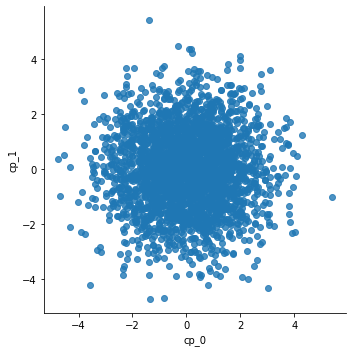

In [22]:
import seaborn as sns

sns.lmplot('cp_0', 'cp_1', data = xpca, fit_reg = False)

# Análisis de Varianza

In [23]:
anova_1 = pd.read_csv(data_path + 'HR_comma_sep.csv')
anova_2 = pd.read_csv(data_path + '/archive-2/train.csv')

In [24]:
anova_1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,area,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [25]:
rho.missing_zero_values_table(anova_2)

Your selected dataframe has 15 columns and 43957 Rows.
There are 3 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
occupation,0,2506,5.7,2506,5.7,object
workclass,0,2498,5.7,2498,5.7,object
native-country,0,763,1.7,763,1.7,object


In [26]:
anova_1['area'].value_counts(1)

sales          0.276018
technical      0.181345
support        0.148610
IT             0.081805
product_mng    0.060137
marketing      0.057204
RandD          0.052470
accounting     0.051137
hr             0.049270
management     0.042003
Name: area, dtype: float64

In [27]:
anova_1['left'].value_counts(1)

0    0.761917
1    0.238083
Name: left, dtype: float64

In [28]:
import scipy.stats as stats

left = anova_1.loc[anova_1['left'] == 1].copy()
st = anova_1.loc[anova_1['left'] == 0].copy()

In [29]:
left['area'].value_counts(1)

sales          0.283954
technical      0.195183
support        0.155419
IT             0.076449
hr             0.060207
accounting     0.057127
marketing      0.056847
product_mng    0.055447
RandD          0.033884
management     0.025483
Name: area, dtype: float64

In [30]:
st['area'].value_counts(1)

sales          0.273539
technical      0.177021
support        0.146482
IT             0.083479
product_mng    0.061603
RandD          0.058278
marketing      0.057315
accounting     0.049265
management     0.047165
hr             0.045852
Name: area, dtype: float64

In [31]:
fvalue, pvalue = stats.f_oneway(left['area'].value_counts(), st['area'].value_counts())
fvalue

7.330027003145587

In [32]:
pvalue

0.014423055463760234

In [33]:
pvalue = stats.f_oneway(left['area'].value_counts(), st['area'].value_counts())[1]

In [34]:
pvalue

0.014423055463760234

In [35]:
stats.f_oneway(anova_1.loc[anova_1['left'] == 1]['average_montly_hours'], 
              anova_1.loc[anova_1['left'] == 0]['average_montly_hours'])

F_onewayResult(statistic=76.60196289119096, pvalue=2.3113035567460063e-18)

In [36]:
anova_1.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,area,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low


In [37]:
from sklearn.preprocessing import StandardScaler

st = StandardScaler()

X = anova_1[[c for c in anova_1.columns if c not in ['left', 'area', 'salary']]].copy()

Xsc = pd.DataFrame(st.fit_transform(X), columns = X.columns)
Xsc

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,-0.147412
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,-0.147412
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,-0.147412
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,-0.147412
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,-0.147412
...,...,...,...,...,...,...,...
14994,-0.856051,-0.853580,-1.462863,-1.002181,-0.341235,-0.411165,-0.147412
14995,-0.976716,-1.379394,-1.462863,-0.821970,-0.341235,-0.411165,-0.147412
14996,-0.976716,-1.087275,-1.462863,-1.162368,-0.341235,-0.411165,-0.147412
14997,-2.022479,1.424944,1.782438,1.580845,0.343655,-0.411165,-0.147412


In [38]:
for c in ['left', 'area', 'salary']:
    Xsc[c] = anova_1[c]
    
Xsc.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,area,salary
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,-0.147412,1,sales,low
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,-0.147412,1,sales,medium
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,-0.147412,1,sales,medium


In [39]:
stats.f_oneway(Xsc.loc[Xsc['left'] == 1]['average_montly_hours'], 
              Xsc.loc[Xsc['left'] == 0]['average_montly_hours'])

F_onewayResult(statistic=76.60196289119098, pvalue=2.3113035567460063e-18)

In [40]:
stats.kruskal(Xsc.loc[Xsc['left'] == 1]['average_montly_hours'], 
              Xsc.loc[Xsc['left'] == 0]['average_montly_hours'])

KruskalResult(statistic=32.36611237321605, pvalue=1.2769400455215123e-08)

In [41]:
sal = {}

for c in list(set(anova_1['salary'])):
    sal[c] = anova_1.loc[anova_1['salary'] == c]['average_montly_hours']
sal

{'high': 72       149
 111      289
 189      156
 267      129
 306      149
         ... 
 14829    148
 14868    130
 14902    159
 14941    131
 14980    238
 Name: average_montly_hours, Length: 1237, dtype: int64,
 'low': 0        157
 3        223
 4        159
 5        153
 6        247
         ... 
 14994    151
 14995    160
 14996    143
 14997    280
 14998    158
 Name: average_montly_hours, Length: 7316, dtype: int64,
 'medium': 1        262
 2        272
 60       226
 61       308
 62       244
         ... 
 14979    296
 14982    137
 14983    257
 14984    148
 14985    254
 Name: average_montly_hours, Length: 6446, dtype: int64}

In [42]:
stats.kruskal(sal['low'], sal['high'], sal['medium'])

KruskalResult(statistic=0.5663191683956489, pvalue=0.7533995476033044)

In [43]:
Xsc.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,area,salary
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,-0.147412,1,sales,low
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,-0.147412,1,sales,medium


In [44]:
areas = list(set(Xsc['area']))
frames = {}

for a in areas:
    frames[a] = Xsc.loc[Xsc['area'] == a]

frames

{'hr':        satisfaction_level  last_evaluation  number_project  \
 31              -0.654943        -0.853580       -1.462863   
 32              -0.856051        -1.204123       -1.462863   
 33              -0.654943        -0.970428       -1.462863   
 34               0.913701         0.899131        0.159788   
 108              0.390820         0.899131       -0.651538   
 ...                   ...              ...             ...   
 14902           -0.654943        -1.496241       -1.462863   
 14975           -2.062701         0.431741        2.593763   
 14976           -0.856051        -1.437818       -1.462863   
 14977            0.793036         0.782283        0.159788   
 14978           -0.856051        -1.437818       -1.462863   
 
        average_montly_hours  time_spend_company  Work_accident  \
 31                -1.342579           -0.341235      -0.411165   
 32                -1.122321           -0.341235      -0.411165   
 33                -1.222439       

# Práctica (Opcional):

Realizar un ANOVA, para comparar si por área se trabaja una cantidad similar de horas, al igual que por rango salarial y por permanencia en la compañía. La idea es tomar las categorías para las columnas:

* Área
* Nivel de sueldo
* left

Y de esas categorías comparar la distribución de las horas promedio de trabajo en el mes. 

Nota: El dataset es anova_1 

Los valores que deben dar son los siguientes:

Para tu variable: area

El valor de tu prueba estádistica es: 0.6810260112509132

Por lo tanto tu p-value es: 0.726899568620661

No se puede rechazar Ho

Para tu variable: salary

El valor de tu prueba estádistica es: 0.4583624407867663

Por lo tanto tu p-value es: 0.6323271153144614

No se puede rechazar Ho

Para tu variable: left

El valor de tu prueba estádistica es: 76.60196289119096

Por lo tanto tu p-value es: 2.3113035567460063e-18

Entonces se rechaza Ho

# Importancia de variables (Select k-best)

In [45]:
kbestframe = pd.read_csv(data_path + '/archive/churn-bigml-80.csv')
kbestframe1 = pd.read_csv(data_path + 'HR_comma_sep.csv')

In [46]:
kbestframe1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,area,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [47]:
kbestframe1.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [48]:
# Reescalar entre 0 y 1, para minimizar el impacto de las escalas.

from sklearn.preprocessing import MinMaxScaler

# Reescalamos las variables continuas
varc = [c for c in kbestframe1 if c not in ['left', 'promotion_last_5years', 'Work_accident', 'area', 'salary']]


# Instanciamos el escalador

mm = MinMaxScaler()

# Transformamos la matriz de las columnas continuas

Xc = kbestframe1[varc].copy()
Xmm = pd.DataFrame(mm.fit_transform(Xc), columns = [c + '_mm' for c in varc])
Xmm

,satisfaction_level_mm,last_evaluation_mm,number_project_mm,average_montly_hours_mm,time_spend_company_mm
0,0.318681,0.265625,0.0,0.285047,0.125
1,0.780220,0.781250,0.6,0.775701,0.500
2,0.021978,0.812500,1.0,0.822430,0.250
3,0.692308,0.796875,0.6,0.593458,0.375
4,0.307692,0.250000,0.0,0.294393,0.125
...,...,...,...,...,...
14994,0.340659,0.328125,0.0,0.257009,0.125
14995,0.307692,0.187500,0.0,0.299065,0.125
14996,0.307692,0.265625,0.0,0.219626,0.125
14997,0.021978,0.937500,0.8,0.859813,0.250


In [49]:
Xmm.describe()

,satisfaction_level_mm,last_evaluation_mm,number_project_mm,average_montly_hours_mm,time_spend_company_mm
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.574542,0.556409,0.360611,0.490889,0.187279
std,0.273220,0.267452,0.246518,0.233379,0.182517
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.384615,0.312500,0.200000,0.280374,0.125000
50%,0.604396,0.562500,0.400000,0.485981,0.125000
75%,0.802198,0.796875,0.600000,0.696262,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
# Asignamos las columnas categóricas
for c in ['promotion_last_5years', 'Work_accident', 'area', 'salary']:
    Xmm[c] = kbestframe1[c]

# Definimos la variable objetivo
tar = 'left'

# Definimos X, y finales
X = Xmm.copy()
y = kbestframe1[tar]

In [51]:
X

,satisfaction_level_mm,last_evaluation_mm,number_project_mm,average_montly_hours_mm,time_spend_company_mm,promotion_last_5years,Work_accident,area,salary
0,0.318681,0.265625,0.0,0.285047,0.125,0,0,sales,low
1,0.780220,0.781250,0.6,0.775701,0.500,0,0,sales,medium
2,0.021978,0.812500,1.0,0.822430,0.250,0,0,sales,medium
3,0.692308,0.796875,0.6,0.593458,0.375,0,0,sales,low
4,0.307692,0.250000,0.0,0.294393,0.125,0,0,sales,low
...,...,...,...,...,...,...,...,...,...
14994,0.340659,0.328125,0.0,0.257009,0.125,0,0,support,low
14995,0.307692,0.187500,0.0,0.299065,0.125,0,0,support,low
14996,0.307692,0.265625,0.0,0.219626,0.125,0,0,support,low
14997,0.021978,0.937500,0.8,0.859813,0.250,0,0,support,low


In [52]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [53]:
# Importamos la clase Kbest de Sklearn

from sklearn.feature_selection import SelectKBest

# Instanciamos la clase
sk = SelectKBest(k = 3)

# Ajustamos la clase
sk.fit(X[[c + '_mm' for c in varc]],y)

SelectKBest(k=3)

In [54]:
sk.get_support()

array([ True, False, False,  True,  True])

In [55]:
# Mapear el soporte con los nombres
skvars = [c + '_mm' for c in varc]
dict(zip(skvars, sk.get_support()))

{'satisfaction_level_mm': True,
 'last_evaluation_mm': False,
 'number_project_mm': False,
 'average_montly_hours_mm': True,
 'time_spend_company_mm': True}

In [56]:
# Ejercicio obteniendo variables dummies

vard = ['area', 'salary']
x_dumm = pd.get_dummies(X[vard])

varbin = ['promotion_last_5years', 'Work_accident']
for c in varbin:
    x_dumm[c] = kbestframe1[c]
    
# Instanciamos la clase
skdumm = SelectKBest(k = 3)

# Merge de Xmm y x_dumm
X = Xmm[[c for c in Xmm if '_mm' in c]].merge(x_dumm, how = 'inner', left_index = True, right_index = True)

# Ajustamos la clase
skdumm.fit(X, y)

# Obtenemos los nombres de las variables
resultados = dict(zip(X.columns, skdumm.get_support()))
resultados

{'satisfaction_level_mm': True,
 'last_evaluation_mm': False,
 'number_project_mm': False,
 'average_montly_hours_mm': False,
 'time_spend_company_mm': True,
 'area_IT': False,
 'area_RandD': False,
 'area_accounting': False,
 'area_hr': False,
 'area_management': False,
 'area_marketing': False,
 'area_product_mng': False,
 'area_sales': False,
 'area_support': False,
 'area_technical': False,
 'salary_high': False,
 'salary_low': False,
 'salary_medium': False,
 'promotion_last_5years': False,
 'Work_accident': True}

In [57]:
X_final = X[[a for a,b in list(zip(X.columns, skdumm.get_support())) if b]]
X_final

,satisfaction_level_mm,time_spend_company_mm,Work_accident
0,0.318681,0.125,0
1,0.780220,0.500,0
2,0.021978,0.250,0
3,0.692308,0.375,0
4,0.307692,0.125,0
...,...,...,...
14994,0.340659,0.125,0
14995,0.307692,0.125,0
14996,0.307692,0.125,0
14997,0.021978,0.250,0


# Análisis de Varianza con Sklearn

In [73]:
# Variance Threshold
from sklearn.feature_selection import VarianceThreshold

# Instanciamos
vt = VarianceThreshold(threshold=.2)

# Ajustamos la clase
vt.fit(kbestframe1[varc])

VarianceThreshold(threshold=0.2)

In [74]:
vt.get_support()

array([False, False,  True,  True,  True])

In [75]:
kbestframe1[[a for a,b in list(zip(kbestframe1.columns, vt.get_support())) if b]]

,number_project,average_montly_hours,time_spend_company
0,2,157,3
1,5,262,6
2,7,272,4
3,5,223,5
4,2,159,3
...,...,...,...
14994,2,151,3
14995,2,160,3
14996,2,143,3
14997,6,280,4


In [76]:
kbestframe1.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [77]:
vt2 = VarianceThreshold(threshold=.1)
vt2.fit(X)

X[[a for a,b in list(zip(X.columns, vt2.get_support())) if b]]

,area_sales,area_support,area_technical,salary_low,salary_medium,Work_accident
0,1,0,0,1,0,0
1,1,0,0,0,1,0
2,1,0,0,0,1,0
3,1,0,0,1,0,0
4,1,0,0,1,0,0
...,...,...,...,...,...,...
14994,0,1,0,1,0,0
14995,0,1,0,1,0,0
14996,0,1,0,1,0,0
14997,0,1,0,1,0,0


In [81]:
vt3 = VarianceThreshold(threshold=.01)
aux = Xmm[Xmm.columns[:5]]
vt3.fit(aux)

aux[[a for a,b in list(zip(aux.columns, vt3.get_support())) if b]]

,satisfaction_level_mm,last_evaluation_mm,number_project_mm,average_montly_hours_mm,time_spend_company_mm
0,0.318681,0.265625,0.0,0.285047,0.125
1,0.780220,0.781250,0.6,0.775701,0.500
2,0.021978,0.812500,1.0,0.822430,0.250
3,0.692308,0.796875,0.6,0.593458,0.375
4,0.307692,0.250000,0.0,0.294393,0.125
...,...,...,...,...,...
14994,0.340659,0.328125,0.0,0.257009,0.125
14995,0.307692,0.187500,0.0,0.299065,0.125
14996,0.307692,0.265625,0.0,0.219626,0.125
14997,0.021978,0.937500,0.8,0.859813,0.250


# Transformación entrópica

In [82]:
entframe = pd.read_csv(data_path + 'Copy of titanic.csv')
entframe1 = pd.read_csv(data_path + 'Placement_Data_Full_Class.csv')

In [83]:
entframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 1. Discretizamos la variable continua

In [85]:
#Tomamos la variable Age:
entframe['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [92]:
'''Generación de cortes:
    i.e. discretización de la variable.'''

#entframe['age_cut'] = pd.cut(entframe['Age'], bins = 10).astype(str)

In [101]:
li = 0
ls = 100
step = 10
entframe['age_cut'] = pd.cut(entframe['Age'],range(li,ls,step)).astype(str)

In [102]:
entframe[['Age', 'age_cut']]

,Age,age_cut
0,22.0,"(20, 30]"
1,38.0,"(30, 40]"
2,26.0,"(20, 30]"
3,35.0,"(30, 40]"
4,35.0,"(30, 40]"
...,...,...
886,27.0,"(20, 30]"
887,19.0,"(10, 20]"
888,NaN,nan
889,26.0,"(20, 30]"


In [103]:
set(entframe['age_cut'])

{'(0, 10]',
 '(10, 20]',
 '(20, 30]',
 '(30, 40]',
 '(40, 50]',
 '(50, 60]',
 '(60, 70]',
 '(70, 80]',
 'nan'}

In [106]:
#Creamos etiquetas:
labels = [
    'infante',
    'adolescente',
    'adulto joven',
    'chavo-ruco',
    'Gastándome la herencia. $.$',
    'No sé mi edad',
    'ya me voy a jubilar...',
    'adulto',    
    '¡Ya me jubilé! ;D',  
]

#Creamos el diccionario para mapear las etiquetas
aux_dict = dict(zip(list(set(entframe['age_cut'])), labels))

#Mapeamos el diccionario
entframe['nuestra_variable'] = entframe['age_cut'].map(aux_dict)

#Ver el resultado
entframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_cut,nuestra_variable
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20, 30]",adulto joven
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30, 40]",adulto
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20, 30]",adulto joven
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30, 40]",adulto
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30, 40]",adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"(20, 30]",adulto joven
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(10, 20]",adolescente
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,nan,No sé mi edad
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"(20, 30]",adulto joven


In [109]:
entframe['nuestra_variable'].value_counts(1, dropna = False)

adulto joven                   0.258137
No sé mi edad                  0.198653
adulto                         0.173962
adolescente                    0.129068
chavo-ruco                     0.096521
infante                        0.071829
ya me voy a jubilar...         0.047138
¡Ya me jubilé! ;D              0.019080
Gastándome la herencia. $.$    0.005612
Name: nuestra_variable, dtype: float64

In [110]:
rho.missing_zero_values_table(entframe)

Your selected dataframe has 14 columns and 891 Rows.
There are 3 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Cabin,0,687,77.1,687,77.1,object
Age,0,177,19.9,177,19.9,float64
Embarked,0,2,0.2,2,0.2,object


## 2. Agrupar a nivel categoría, sacamos la frecuencia de apariciones de esa categoría y obtenemos el total de eventos presentados para dicha categoría

In [111]:
aux = entframe[['nuestra_variable', 'Survived']].groupby('nuestra_variable').agg(['count', 'sum'])
aux

Survived    
                               count sum
nuestra_variable                        
Gastándome la herencia. $.$        5   1
No sé mi edad                    177  52
adolescente                      115  44
adulto                           155  69
adulto joven                     230  84
chavo-ruco                        86  33
infante                           64  38
ya me voy a jubilar...            42  17
¡Ya me jubilé! ;D                 17   4

## Paso 2.2 Sacamos las frecuencias de evento y no evento a nivel categoría

In [112]:
aux['evento'] = aux['Survived', 'sum']
aux['no_evento'] = aux['Survived', 'count'] - aux['evento']
aux

Survived     evento no_evento
                               count sum                 
nuestra_variable                                         
Gastándome la herencia. $.$        5   1      1         4
No sé mi edad                    177  52     52       125
adolescente                      115  44     44        71
adulto                           155  69     69        86
adulto joven                     230  84     84       146
chavo-ruco                        86  33     33        53
infante                           64  38     38        26
ya me voy a jubilar...            42  17     17        25
¡Ya me jubilé! ;D                 17   4      4        13

## Paso 3. Sacamos los porcentajes de evento

In [113]:
aux['%evento'] = aux['evento']/aux['evento'].sum()
aux['%no_evento'] = aux['no_evento']/aux['no_evento'].sum()
aux

Survived     evento no_evento   %evento %no_evento
                               count sum                                      
nuestra_variable                                                              
Gastándome la herencia. $.$        5   1      1         4  0.002924   0.007286
No sé mi edad                    177  52     52       125  0.152047   0.227687
adolescente                      115  44     44        71  0.128655   0.129326
adulto                           155  69     69        86  0.201754   0.156648
adulto joven                     230  84     84       146  0.245614   0.265938
chavo-ruco                        86  33     33        53  0.096491   0.096539
infante                           64  38     38        26  0.111111   0.047359
ya me voy a jubilar...            42  17     17        25  0.049708   0.045537
¡Ya me jubilé! ;D                 17   4      4        13  0.011696   0.023679

In [114]:
aux['evento'].sum()

342

In [116]:
aux['no_evento'].sum()

549

# Paso 4. Obtención del WoE

In [117]:
aux['WoE'] = np.log(aux['%no_evento']/aux['%evento'])
aux

Survived     evento no_evento   %evento  \
                               count sum                              
nuestra_variable                                                      
Gastándome la herencia. $.$        5   1      1         4  0.002924   
No sé mi edad                    177  52     52       125  0.152047   
adolescente                      115  44     44        71  0.128655   
adulto                           155  69     69        86  0.201754   
adulto joven                     230  84     84       146  0.245614   
chavo-ruco                        86  33     33        53  0.096491   
infante                           64  38     38        26  0.111111   
ya me voy a jubilar...            42  17     17        25  0.049708   
¡Ya me jubilé! ;D                 17   4      4        13  0.011696   

                            %no_evento       WoE  
                                                  
nuestra_variable                                  
Gastándome la herencia. $.$   0.007286  0.913007  
No sé mi edad                 0.227687  0.403782  
adolescente                   0.129326  0.005203  
adulto                        0.156648 -0.253047  
adulto joven                  0.265938  0.079502  
chavo-ruco                    0.096539  0.000497  
infante                       0.047359 -0.852777  
ya me voy a jubilar...        0.045537 -0.087625  
¡Ya me jubilé! ;D             0.023679  0.705367

# Paso 5. Obtenemos el IV

In [118]:
aux['IV'] = (aux['%no_evento'] - aux['%evento'])*aux['WoE']
aux

Survived     evento no_evento   %evento  \
                               count sum                              
nuestra_variable                                                      
Gastándome la herencia. $.$        5   1      1         4  0.002924   
No sé mi edad                    177  52     52       125  0.152047   
adolescente                      115  44     44        71  0.128655   
adulto                           155  69     69        86  0.201754   
adulto joven                     230  84     84       146  0.245614   
chavo-ruco                        86  33     33        53  0.096491   
infante                           64  38     38        26  0.111111   
ya me voy a jubilar...            42  17     17        25  0.049708   
¡Ya me jubilé! ;D                 17   4      4        13  0.011696   

                            %no_evento       WoE            IV  
                                                                
nuestra_variable                                                
Gastándome la herencia. $.$   0.007286  0.913007  3.982533e-03  
No sé mi edad                 0.227687  0.403782  3.054206e-02  
adolescente                   0.129326  0.005203  3.491302e-06  
adulto                        0.156648 -0.253047  1.141392e-02  
adulto joven                  0.265938  0.079502  1.615804e-03  
chavo-ruco                    0.096539  0.000497  2.380633e-08  
infante                       0.047359 -0.852777  5.436650e-02  
ya me voy a jubilar...        0.045537 -0.087625  3.654201e-04  
¡Ya me jubilé! ;D             0.023679  0.705367  8.452776e-03

In [119]:
#IV total de la variable es la suma de las categorías:
iv_nuestra_variable = aux['IV'].sum()
iv_nuestra_variable

0.11074252393000614

In [122]:
entframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_cut,nuestra_variable
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20, 30]",adulto joven
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30, 40]",adulto
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20, 30]",adulto joven
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30, 40]",adulto
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30, 40]",adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"(20, 30]",adulto joven
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(10, 20]",adolescente
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,nan,No sé mi edad
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"(20, 30]",adulto joven


# Práctica

Obtener el IV de la variable Fare y de la variable Pclass

Nota: los cortes para la variable fare, son equidistantes de 5 en 5.